# İsim Soyisim: Ömer Cebeci
# Numara: 171024007
# Ekip No A10

In [1]:
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use␣
# ,→"signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib notebook
# to read .csv data file
from scipy.io import loadmat

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

 # ÖRNEK -2

In [2]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency␣
                                        #,→components)
n = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5) # component with w1 = 0.8*pi frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)

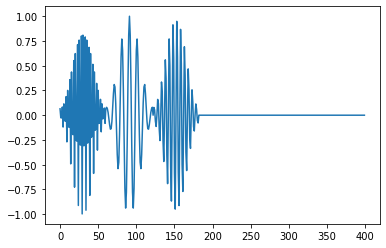

In [3]:
plt.figure()
plt.plot(xn)

In [4]:
# Calculate the Fourier transform of xn
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

In [11]:
import math

In [10]:
def SystemFunction(w):
    kk=np.array([1.0,2.0,3.0,4.0])
    ck=np.zeros(len(kk))
    ck=0.95*np.exp(1j*(0.15*np.pi+0.02*np.pi))  
    z1=np.exp(-1j*w)
    zs=np.array([.98*np.exp(1j*0.8*np.pi),.98*np.exp(-1j*0.8*np.pi)])
    ps=np.array([.8*np.exp(1j*0.4*np.pi),.8*np.exp(-1j*0.4*np.pi)])
    Hw=(1-zs[0]*z1) *(1-zs[1]*z1) / ((1-ps[0]-z1)*(1-ps[1]*z1))
    dummy=np.zeros(len(kk))
    for k in range(4):
        dummy[k]=(ck[k].conjugate()-z1)*(ck[k]-z1) / (1-ck[k]*z1)*(1-ck[k].conjugate()*z1)
        Hw[k]=Hw[k]*math.pow(dummy[k],2)
    K=1    
    polezz=[ck,ck,ck.conj(),ck.conj()].transpose
    zerozz= 1/polezz

    polezz=[(polezz,ps.transpose())]
    zerozz=[zerozz,zs.transpose()]
    Hw=Hw/3
    return Hw,polezz,zerozz,K

In [68]:
def SystemFunction(w):
    kk=[1.0,2.0,3.0,4.0]
    ck=np.zeros(len(kk))
    for k in range(len(kk)):
        ck[k]=0.95*np.exp(1j*(0.15*np.pi+0.02*np.pi*kk[k]))
  
    zl=np.exp(-1j*w)
    eleman1_zs=0.98*np.exp(1j*0.8*np.pi)
    eleman2_zs=0.98*np.exp(-1j*0.8*np.pi)
    zs=np.array([ eleman1_zs, eleman2_zs])
    
    eleman1_ps=0.8*np.exp(1j*0.4*np.pi)
    eleman2_ps=0.8*np.exp(-1j*0.4*np.pi)
    ps=np.array([eleman1_ps,eleman2_ps])
    
    Hw=(1-zs[0]*zl) *(1-zs[1]*zl) / ((1-ps[0]*zl)*(1-ps[1]*zl))
    dummy=np.zeros(len(kk))
    for k in range(len(kk)):
        dummy[k]=((ck[k].conj())-zl[k]) *(ck[k]-zl[k])/ (1-ck[k]*zl[k]) * (1-((ck[k].conj())*zl[k])) 
        Hw[k]=Hw[k]*math.pow(dummy[k],2)
    K=1    
    polezz=np.array([ck,ck,ck.conj(),ck.conj()])
    polezz=polezz.transpose()
    zerozz= 1.0/polezz

    polezz=[(polezz,ps.transpose())]
    zerozz=[zerozz,zs.transpose()]
    Hw=Hw/3
    return Hw,polezz,zerozz,K

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

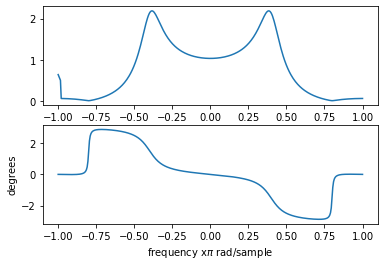

In [69]:
Hw,polezz,zerozz,K=(SystemFunction(w)) 
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

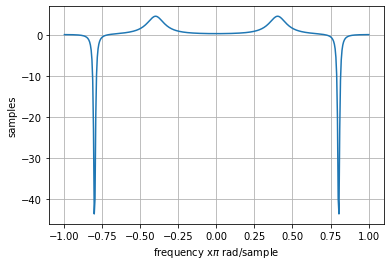

In [61]:

# calculate the group delay of the system:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()

# Örnek -3 

<IPython.core.display.Javascript object>


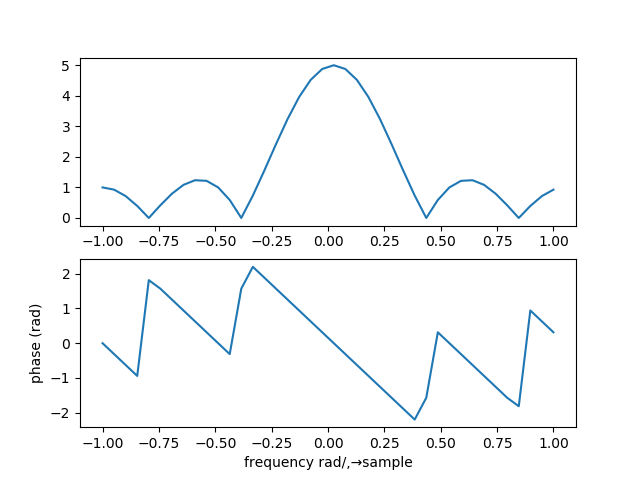

([<matplotlib.lines.Line2D at 0x211d21e0808>],
 Text(0, 0.5, 'phase (rad)'),
 Text(0.5, 0, 'frequency rad/,→sample'))

In [136]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))
w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('phase (rad)'), plt.xlabel('frequency rad/,→sample')

([<matplotlib.lines.Line2D at 0x1cd3a8589c8>], Text(0, 0.5, 'phase (rad)'))

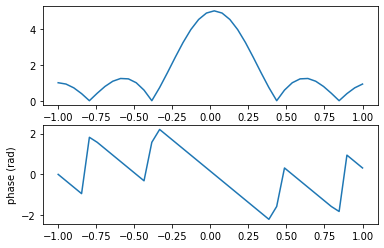

In [73]:
N= 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))
w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('phase (rad)')

Text(0, 0.5, 'group delay (samples)')

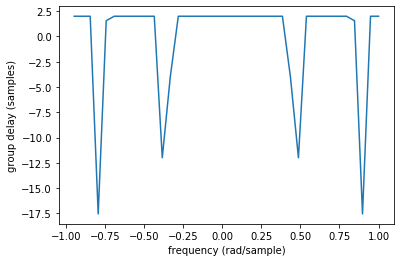

In [74]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

In [77]:
n = np.arange(0, N, 1) # first create the index vector at N points
w0 = 0.1*np.pi # frequency of the input signal
xn = np.cos(w0*n) # create the input signal at w0
Xw = np.fft.fftshift(fft(xn, N)) # compute the frequency response (in the␣

Yw_shifted = Hw * Xw # compute the fft of the output signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw))

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


(<StemContainer object of 3 artists>, None)

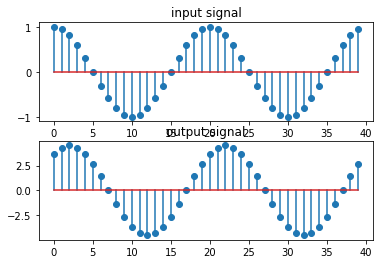

In [78]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text('input signal')
ax2.stem(n, yn), ax2.title.set_text('output signal')

# Örnek-4

In [200]:
# importing an IIR filter
filter_data = loadmat('butterworth.mat') # load the filter obtained from␣
#,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣
#,→convert them to float (from string)
b = Coeffs[:,0] # first column is b
a = Coeffs[:,1] # second column is a (only if the filter is IIR)

<IPython.core.display.Javascript object>


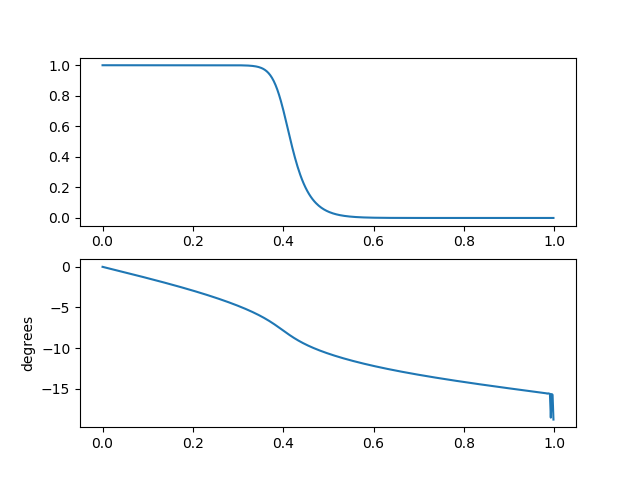

([<matplotlib.lines.Line2D at 0x1cd3b219c48>], Text(0, 0.5, 'degrees'))

In [201]:
w, Hw = sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')

<IPython.core.display.Javascript object>


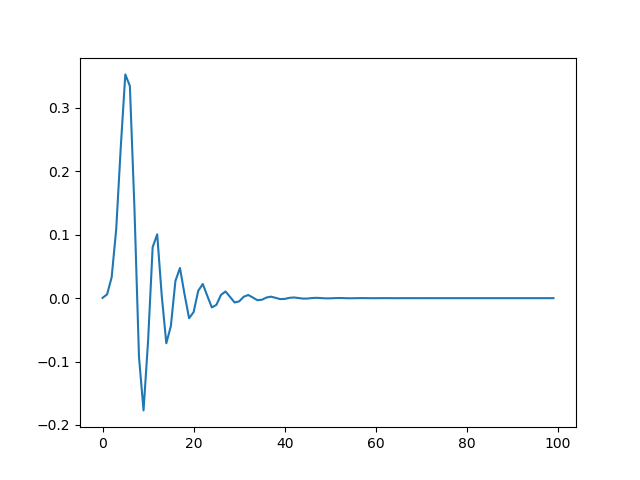

In [84]:
n, hn = sgnl.dimpulse((b,a,1), n=100) # compute the impulse response␣
#,→for 100 points
plt.figure()
plt.plot(n, np.squeeze(hn))

<IPython.core.display.Javascript object>


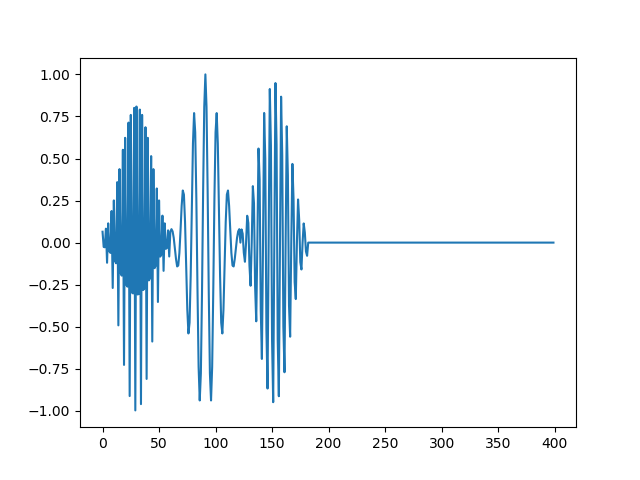

In [86]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency␣

n1 = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n1/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n1) # component with w1 = 0.2*pi␣

x2 = wn*np.cos(0.4*np.pi*n1 - np.pi/2) # component with w1 = 0.4*pi␣

x3 = wn*np.cos(0.8*np.pi*n1 - np.pi/5) # component with w1 = 0.8*pi␣

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis=None)
plt.figure()
plt.plot(xn)

In [87]:
yn = sgnl.lfilter(b, a, xn)

<IPython.core.display.Javascript object>


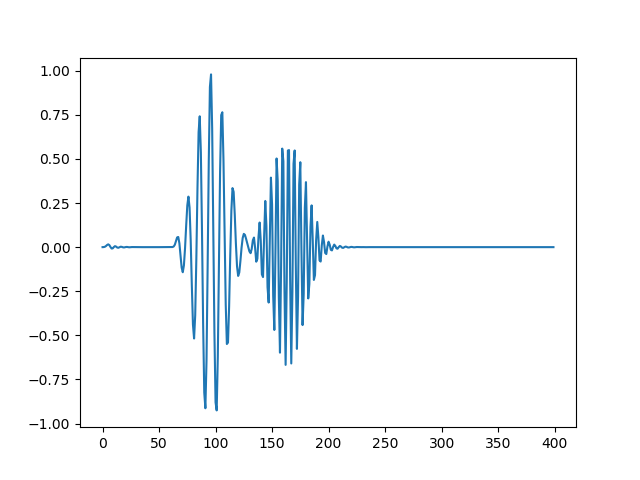

In [88]:
plt.figure()
plt.plot(yn)

# SORULAR

# Soru-1

<IPython.core.display.Javascript object>


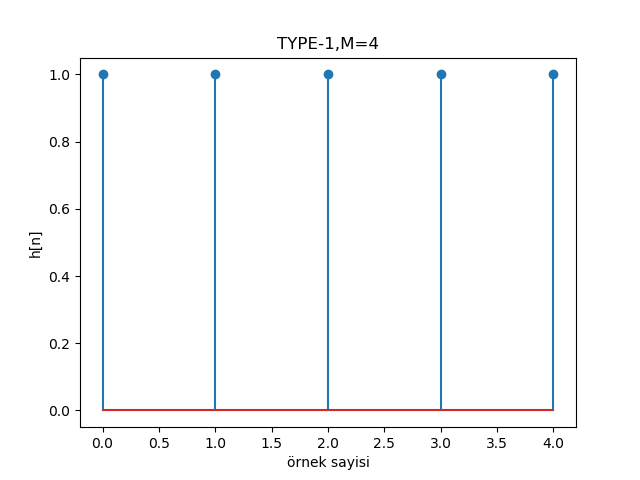

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'TYPE-1,M=4')

In [151]:
# TYPE-1
#M=4, h[n]=h[M-n] M=çift,tamsayı olmalı
#h[0]=h[4]
#h[1]=h[3]
#h[2]=h[2]

hn=[1,1,1,1,1]
n=np.arange(0,5)
plt.figure()
plt.stem(n,hn)
plt.xlabel("örnek sayisi")
plt.ylabel("h[n]")
plt.title("TYPE-1,M=4")

<IPython.core.display.Javascript object>


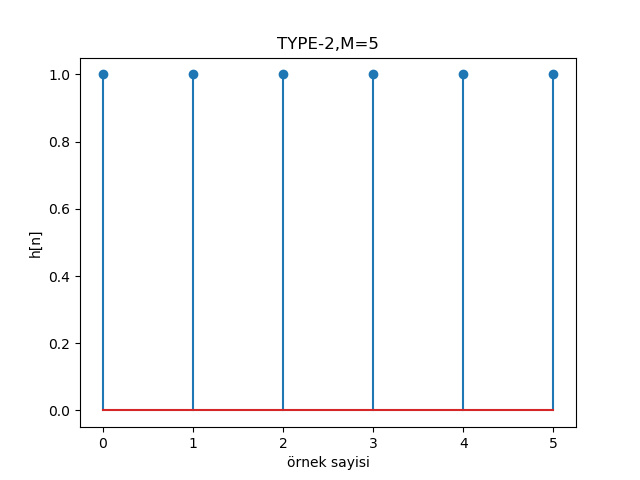

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'TYPE-2,M=5')

In [152]:
# TYPE-2
#M=5, h[n]=h[M-n] M=çift,tamsayı olmalı
#h[0]=h[5]
#h[1]=h[4]
#h[2]=h[3]

hn=[1,1,1,1,1,1]
n=np.arange(0,6)
plt.figure()
plt.stem(n,hn)
plt.xlabel("örnek sayisi")
plt.ylabel("h[n]")
plt.title("TYPE-2,M=5")

<IPython.core.display.Javascript object>


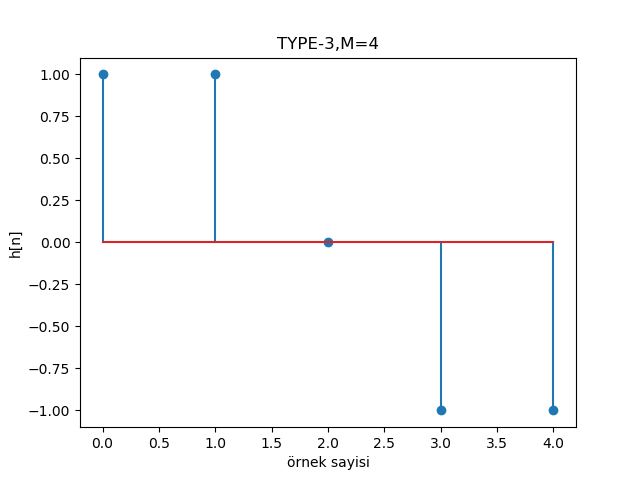

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'TYPE-3,M=4')

In [153]:
# TYPE-3
#M=4, h[n]=-1*h[M-n] M=çift,tamsayı olmalı
#h[0]=-1*h[4]
#h[1]=-1*h[3]
#h[2]=0

hn=[1,1,0,-1,-1]
n=np.arange(0,5)
plt.figure()
plt.stem(n,hn)
plt.xlabel("örnek sayisi")
plt.ylabel("h[n]")
plt.title("TYPE-3,M=4")

<IPython.core.display.Javascript object>


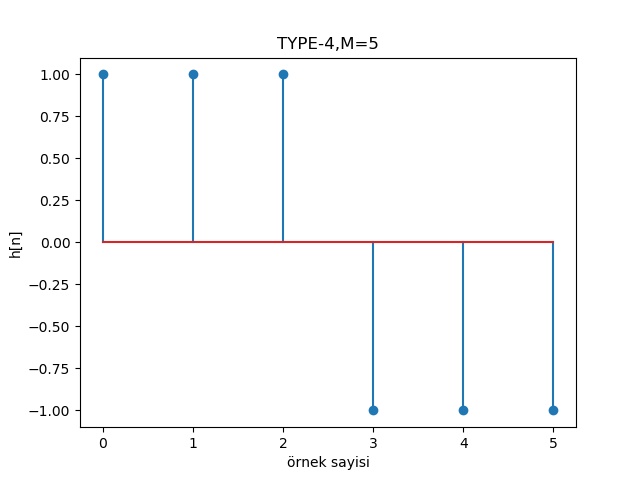

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'TYPE-4,M=5')

In [154]:
# TYPE-4
#M=5, h[n]=-1*h[M-n] M=çift,tamsayı olmalı
#h[0]=-1*h[5]
#h[1]=-1*h[4]
#h[2]=-1*h[3]

hn=[1,1,1,-1,-1,-1]
n=np.arange(0,6)
plt.figure()
plt.stem(n,hn)
plt.xlabel("örnek sayisi")
plt.ylabel("h[n]")
plt.title("TYPE-4,M=5")

<IPython.core.display.Javascript object>


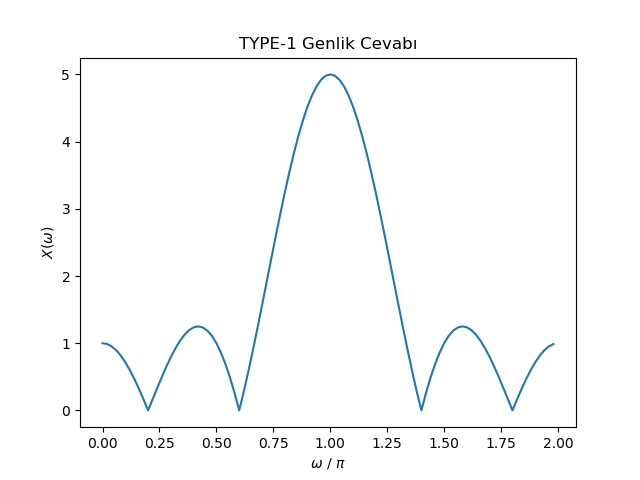

<IPython.core.display.Javascript object>


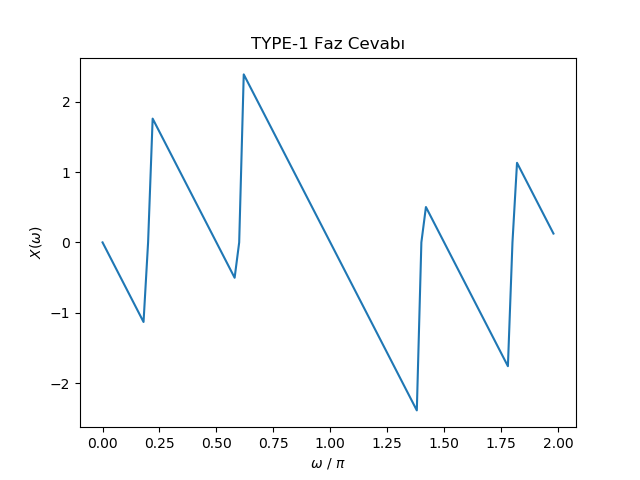

In [155]:
## TYPE-1 FOURİER TRANSFORM
N=100
hn=[1,1,1,1,1]
w = np.arange(0, 2*np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
hw = np.fft.fftshift(np.fft.fft(hn,N)) # ayrık zamanlı işaretin Fourier transformu

plt.figure()
plt.plot(w/np.pi,abs(hw)) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-1 Genlik Cevabı")
plt.show()



plt.figure()
plt.plot(w/np.pi,np.unwrap(np.angle(hw))) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-1 Faz Cevabı")
plt.show()

99


<IPython.core.display.Javascript object>


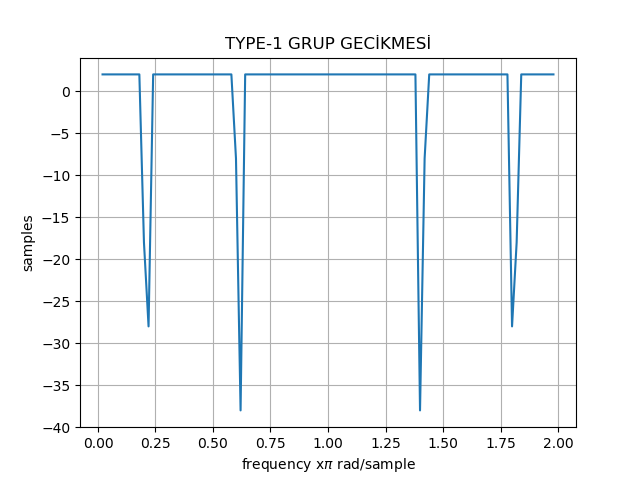

In [156]:
## TYPE-1 GRUP GECİKMESİ

hw1_phase=np.unwrap(np.angle(hw1))
tau_w = -np.diff(hw1_phase)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("TYPE-1 GRUP GECİKMESİ")
plt.grid()

# Çizdirilen filtrenin genlik cevabına bakılacak olursa; Filtrenin ana lobunun (enerjisinin toplandığı bölge) merkez de olduğu görülmektedir.Yan loplar ise yüksek ve alçak frekanslarda gözükmektedir.Bu yüzden alçak geçiren filtre olarak kullanılabilir.

# Genlik grafiğine bakıldığı zaman ana lob merkezde olmadığı için bant geçiren filtre olarak da kullanılabilir.


# TYPE-1 filtresi gerçektende alçak geçiren filtre olarak kullanılabilir.(Derste öğrenilen bilgilere göre)


# Grup gecikmesi belirli bölgelerde sabittir.Zaten faz cevabı da bu bölgelerde lineer olmuştur.


In [38]:
## KUTUP DİYAGRAMINI ÇİZDİRMEK İÇİN AŞAĞIDAKİ FONKSİYON DAHA ÖNCEKİ LABLARDAN ALINMIŞTIR.


In [39]:
def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


<Figure size 432x288 with 0 Axes>

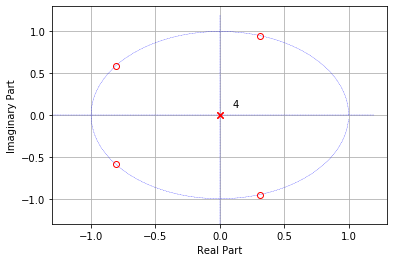

In [40]:
num = np.array([1,1,1,1,1]) 
denum = np.array([1,0,0,0,0])
plt.figure()
zplane(num,denum)

## Sıfır noktasında 4 adet kutup noktası bulunmaktadır.Bütün kutup noktaları birim çember içerisinde olduğu için filtre kararlı denebilir.Ki zaten FIR bir filtre tasarlanmıştır.

<IPython.core.display.Javascript object>


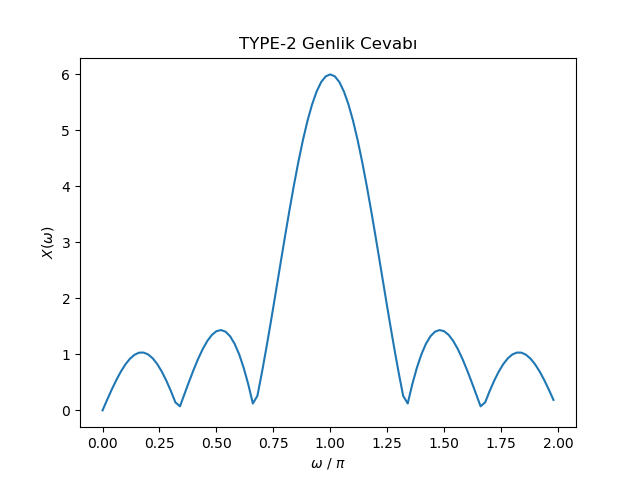

<IPython.core.display.Javascript object>


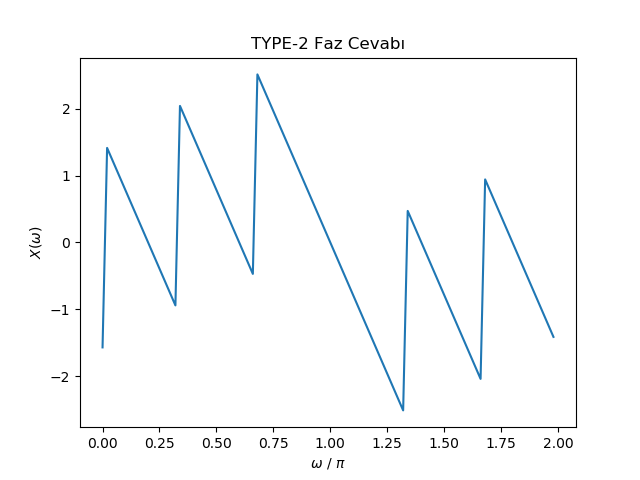

In [157]:
## TYPE-2 FOURİER TRANSFORM
N=100
hn=[1,1,1,1,1,1]
w = np.arange(0, 2*np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
hw = np.fft.fftshift(np.fft.fft(hn,N)) # ayrık zamanlı işaretin Fourier transformu

plt.figure()
plt.plot(w/np.pi,abs(hw)) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-2 Genlik Cevabı")
plt.show()



plt.figure()
plt.plot(w/np.pi,np.unwrap(np.angle(hw))) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-2 Faz Cevabı")
plt.show()

99


<IPython.core.display.Javascript object>


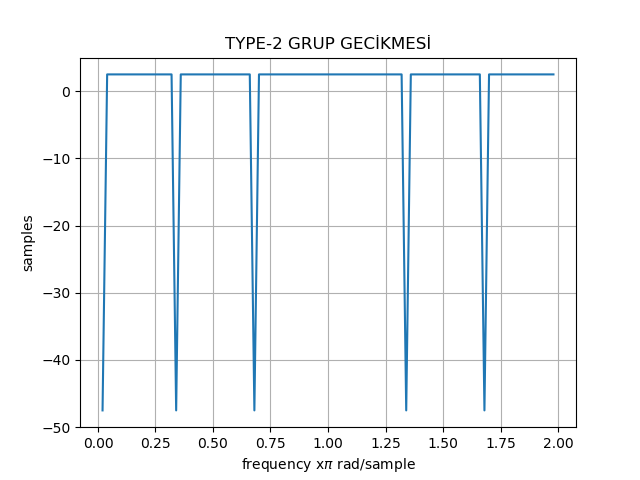

In [158]:
## TYPE-2 GRUP GECİKMESİ

hw_phase=np.unwrap(np.angle(hw))
tau_w = -np.diff(hw_phase)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("TYPE-2 GRUP GECİKMESİ")
plt.grid()

# TYPE-2 de gene TYPE-1 de olduğu gibi Alçak Geçiren bir filtre olarak kullanılabilir.


# Genlik grafiğine bakıldığı zaman ana lob merkezde olmadığı için bant geçiren filtre olarak da kullanılabilir.



# TYPE-2 filtresi gerçektende alçak geçiren filtre olarak kullanılabilir.(Derste öğrenilen bilgilere göre)


# Grup gecikmesi belirli bölgelerde sabittir.Zaten faz cevabı da bu bölgelerde lineer olmuştur.


<IPython.core.display.Javascript object>


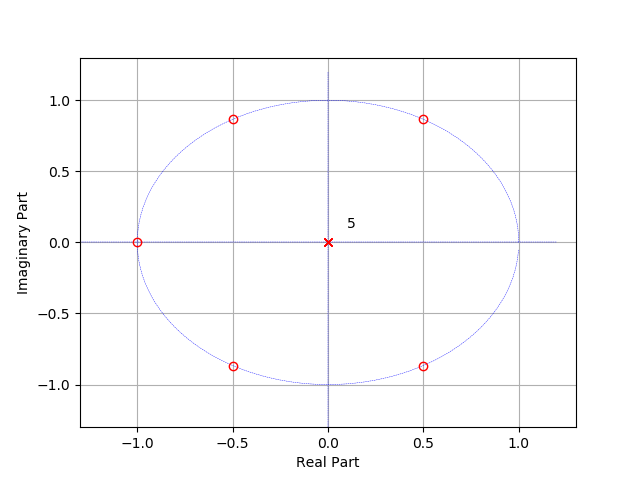

In [167]:
num = np.array([1,1,1,1,1,1]) 
denum = np.array([1,0,0,0,0,0])

zplane(num,denum)

## Sıfır noktasında 4 adet kutup noktası bulunmaktadır.Bütün kutup noktaları birim çember içerisinde olduğu için filtre kararlı denebilir.Ki zaten FIR bir filtre tasarlanmıştır.

<IPython.core.display.Javascript object>


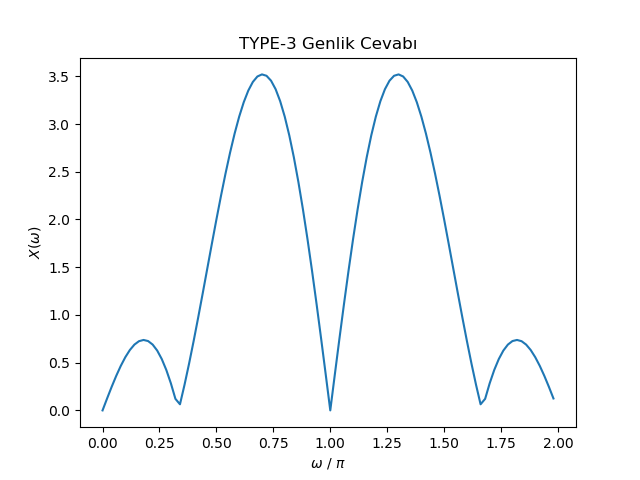

<IPython.core.display.Javascript object>


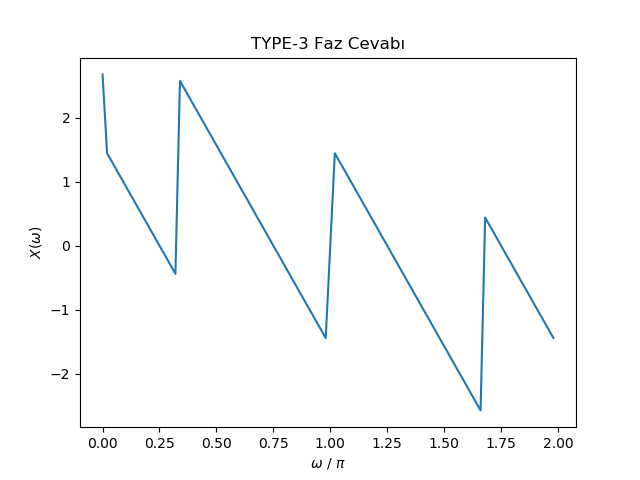

In [160]:
## TYPE-3 FOURİER TRANSFORM
N=100
hn=[1,1,0,-1,-1]
w = np.arange(0, 2*np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
hw = np.fft.fftshift(np.fft.fft(hn,N)) # ayrık zamanlı işaretin Fourier transformu

plt.figure()
plt.plot(w/np.pi,abs(hw)) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-3 Genlik Cevabı")
plt.show()



plt.figure()
plt.plot(w/np.pi,np.unwrap(np.angle(hw))) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-3 Faz Cevabı")
plt.show()

99


<IPython.core.display.Javascript object>


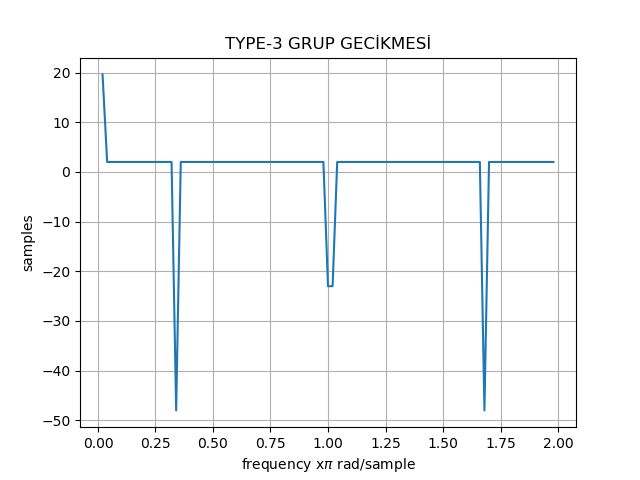

In [161]:
## TYPE-3 GRUP GECİKMESİ

hw_phase=np.unwrap(np.angle(hw))
tau_w = -np.diff(hw_phase)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("TYPE-3 GRUP GECİKMESİ")
plt.grid()

# Filtrenin genlik cevabı incelendiğinde filtrenin enerjisinin merkezde değil belirli frekans aralığında olduğu gözlemlenmiştir.Bundan dolayı Bant geçiren bir filtre olarak kullanılabileceği yorumu yapılabilir.Zaten Type-3 filtresi sadece bant geçiren olarak kullanılabilir.(Ders bilgisi)


# Faz grafiğinin lineer olduğu bölgede (Enerjinin büyük bir kısmının toplandığı bölgede) grup gecikmesi sabitti.Yani bütün değerler aynı oranda gecikmiştir.


<IPython.core.display.Javascript object>


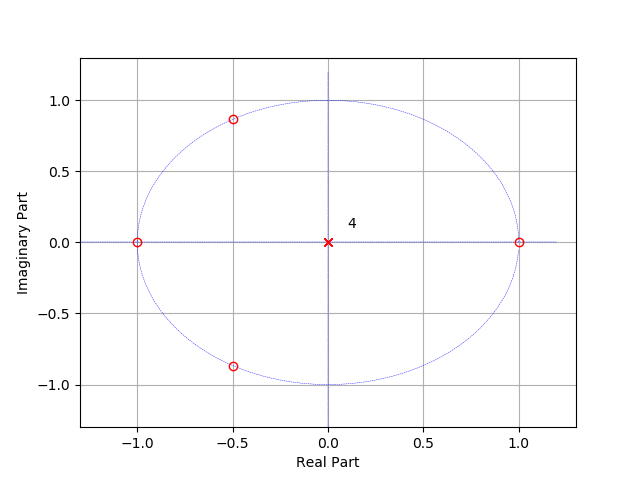

In [162]:
num = np.array([1,1,0,-1,-1])
denum = np.array([1,0,0,0,0])

zplane(num,denum)


## Sıfır noktasında 4 adet kutup noktası bulunmaktadır.Bütün kutup noktaları birim çember içerisinde olduğu için filtre kararlı denebilir.Ki zaten FIR bir filtre tasarlanmıştır.

<IPython.core.display.Javascript object>


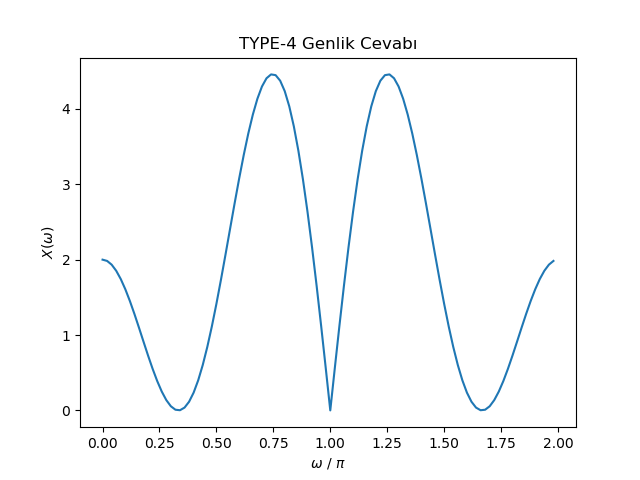

<IPython.core.display.Javascript object>


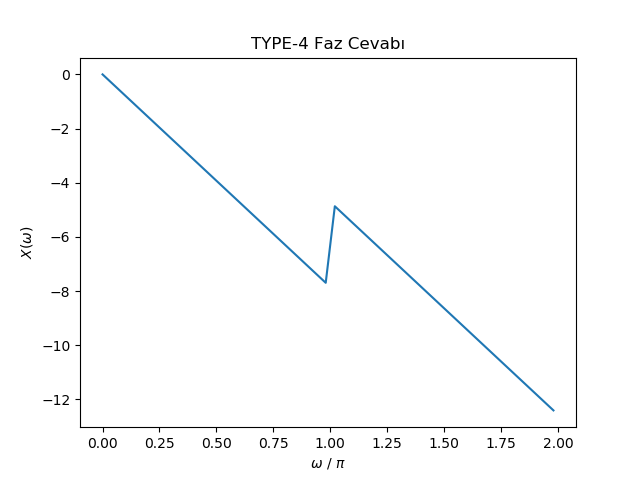

In [163]:
## TYPE-4 FOURİER TRANSFORM
N=100
hn=[1,1,1,-1,-1,-1]
w = np.arange(0, 2*np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
hw = np.fft.fftshift(np.fft.fft(hn,N)) # ayrık zamanlı işaretin Fourier transformu

plt.figure()
plt.plot(w/np.pi,abs(hw)) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-4 Genlik Cevabı")
plt.show()



plt.figure()
plt.plot(w/np.pi,np.unwrap(np.angle(hw))) # X(w) işaretinin grafiğinin çizdirilmesi
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$") # grafiğin y ekseninin isimlendirilmesi
plt.title("TYPE-4 Faz Cevabı")
plt.show()

99


<IPython.core.display.Javascript object>


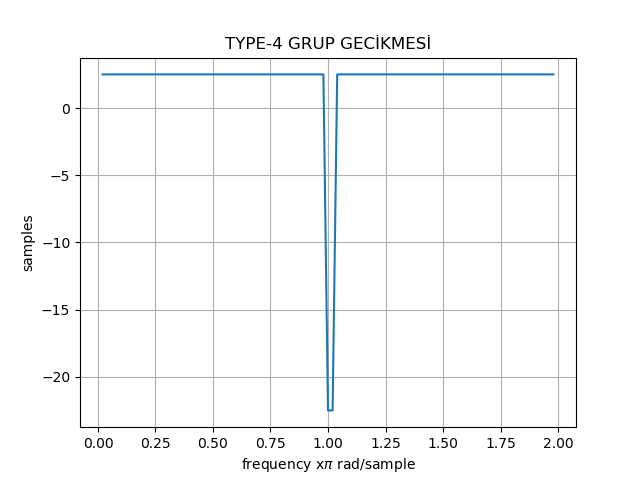

In [164]:
## TYPE-4 GRUP GECİKMESİ

hw_phase=np.unwrap(np.angle(hw))
tau_w = -np.diff(hw_phase)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("TYPE-4 GRUP GECİKMESİ")
plt.grid()

# Filtrenin genlik cevabı incelendiğinde filtrenin enerjisinin merkezde değil belirli frekans aralığında olduğu gözlemlenmiştir.Bundan dolayı Bant geçiren bir filtre olarak kullanılabileceği yorumu yapılabilir.Zaten Type-3 filtresi sadece bant geçiren olarak kullanılabilir.(Ders bilgisi)


# Faz grafiğinin lineer olduğu bölgede (Enerjinin büyük bir kısmının toplandığı bölgede) grup gecikmesi sabitti.Yani bütün değerler aynı oranda gecikmiştir.


In [165]:
def zplane_(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

<IPython.core.display.Javascript object>


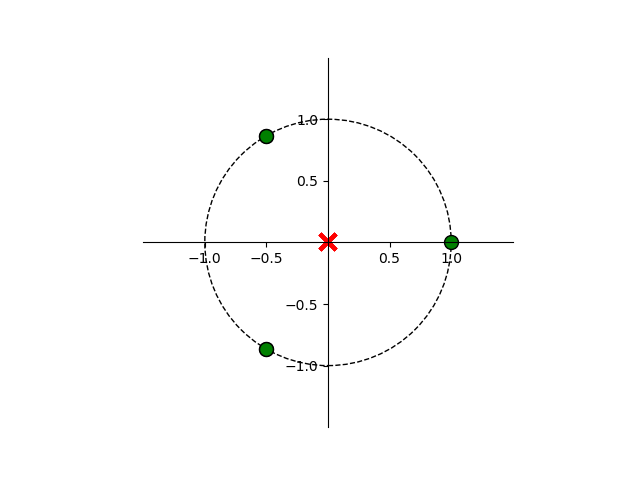

(array([ 1.        +0.j        , -0.50000001+0.86602541j,
        -0.50000001-0.86602541j, -0.49999999+0.8660254j ,
        -0.49999999-0.8660254j ]), array([0., 0., 0., 0., 0.]), 1.0)

In [166]:
num = np.array([1,1,1,-1,-1,-1]) 
denum = np.array([1,0,0,0,0,0])
plt.figure()
zplane_(num,denum,filename=None)

## Sıfır noktasında 4 adet kutup noktası bulunmaktadır.Bütün kutup noktaları birim çember içerisinde olduğu için filtre kararlı denebilir.Ki zaten FIR bir filtre tasarlanmıştır.

## TYPE-4'ün kutup sıfır diyagramında başka bir fonksiyon kullanılmıştır.

## Daha önceki lab için kullanılan fonksiyon çalıştırılamamıştır.

# Soru-2

In [3]:
## 1. AGF (FIR)
filter_data = loadmat('low_pass_deneme2.mat') # load the filter obtained from␣
# low_pass_deneme
#lowpass_fır
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣

b = Coeffs[:,0] # first column is b


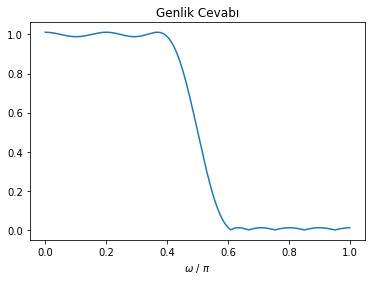

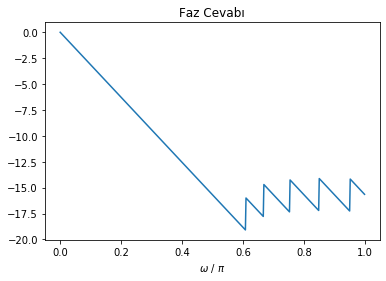

In [4]:
w, Hw = sgnl.freqz(b)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
plt.figure()
plt.title("Genlik Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_mag)

plt.figure()
plt.title("Faz Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_phs)




511


<IPython.core.display.Javascript object>


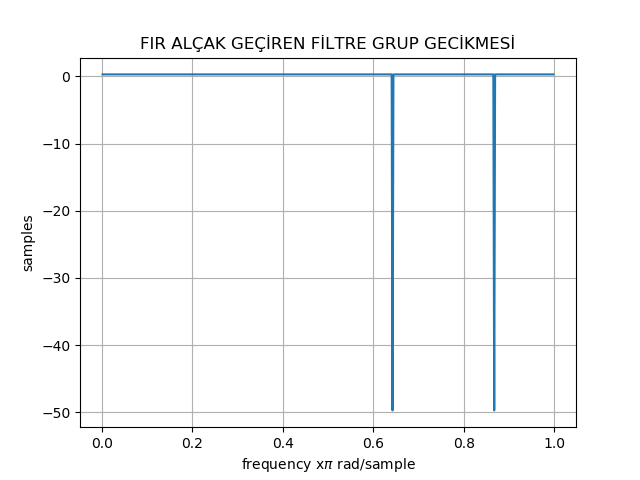

In [172]:
## Grup Gecikmesi 
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("FIR ALÇAK GEÇİREN FİLTRE GRUP GECİKMESİ")
plt.grid()


## Yukarıdaki filtre sönümleme bandı 0.2*pi ve durdurma bandının 0.3*pi olan FIR Equiripple (grid density 16,N=4) bir filtredir.
## Filtre pyfda programı ile çizdirildiğinde kesme frekansının 0.3pi olduğu daha net bir şekilde gözükmektedir.
## Grup gecikmesi de beklenildiği gibi fazın lineer olduğu yerlerde sabit doğru olacak şekilde gelmiştir.

## Pydfa progrmanda elde edilen Genlik ve Faz sinyallerinin yarı kısımları Pythonda gözlemlenmiştir.Fakat her iki programdaki karakteristikler de aynıdır.

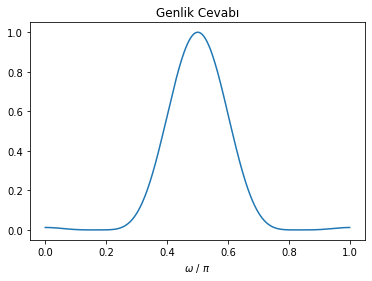

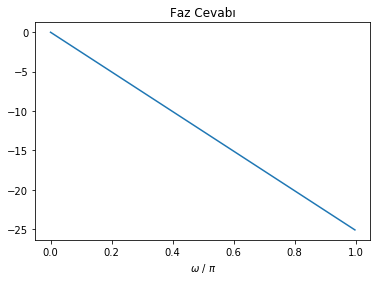

In [98]:
## FIR BandPass
 
filter_data = loadmat('bandpass_fır.mat') # load the filter obtained from␣

Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣

b = Coeffs[:,0] # first column is b


w, Hw = sgnl.freqz(b)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
plt.figure()
plt.title("Genlik Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_mag)

plt.figure()
plt.title("Faz Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_phs)


511


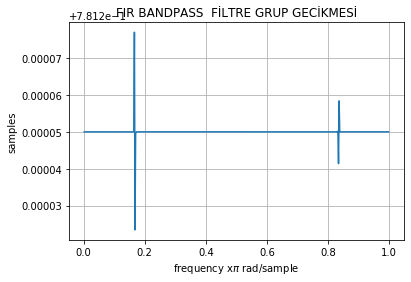

In [99]:
## Grup Gecikmesi 
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("FIR BANDPASS  FİLTRE GRUP GECİKMESİ")
plt.grid()


## Beklenildiği gibi bant genişliği 0.3pi olacak şekilde bant geçiren filtre tasarlanmıştır.Filtrenin genlik noktasında ki kazanç değeri(dB cinsinden) ile kesme frekanslarındaki kazanç değerleri ile arasındaki fark 3dB den fazla olarak gözlemlenmiştir.

## b değerleri kullanılarak elde edilen Hw_genlik karakteristlik olarak pydfa da tasarlanan filtre ile aynıdır.Bant geçiren filtrenin Python da incelendiğinde bant genişliğinin 3 Hz olduğu gözükmektedir.

## Faz grafikleri aynıdır.

## Grup gecikmesi de faz grafiğinden de anlaşılacağı gibi fazın lineer değiştiği bölgelerde sabit gelmiştir.

## Grup gecikmesinin Anlik arttığı ve sonra azaldığı bazı bölgeler tespit edilmiştir.

## Filtre MovingAverage yöntemi ile tasarlanmıştır.


# Soru-3

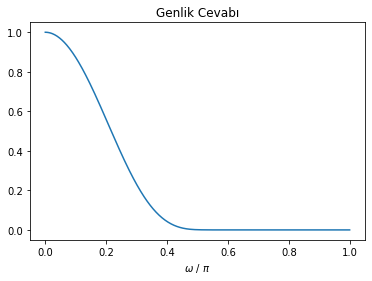

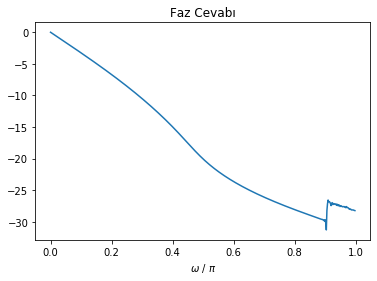

In [102]:
# IIR Alçak Geçiren Filtre

filter_data = loadmat('lowpass_ıır.mat') 

Coeffs = filter_data['ba'].astype(np.float) 

b = Coeffs[:,0] # first column is b
a = Coeffs[:,1] # second column is a (only if the filter is IIR)



w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
plt.figure()
plt.title("Genlik Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_mag)

plt.figure()
plt.title("Faz Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_phs)

511


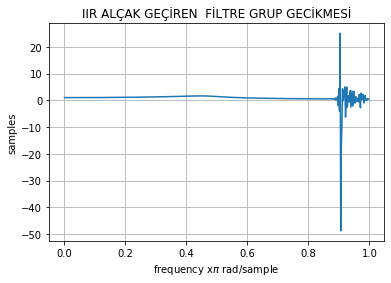

In [104]:
## Grup Gecikmesi 
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("IIR ALÇAK GEÇİREN  FİLTRE GRUP GECİKMESİ")
plt.grid()

## Filtrenin bant genişliği ayarlandığı gibi 0.3*pi olarak görülmüştür.

## Faz cevabı ve grup gecikmesi tasarlandığı gibi elde edilmiştir. Faz cevabının lineer olduğu kısımlarda grup gecikmesi sabittir.

## IIR Bessel Yöntemi kullanılmıştır.



<IPython.core.display.Javascript object>


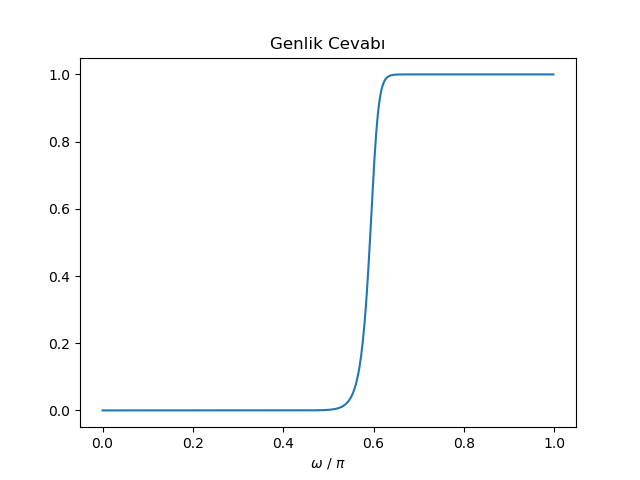

<IPython.core.display.Javascript object>


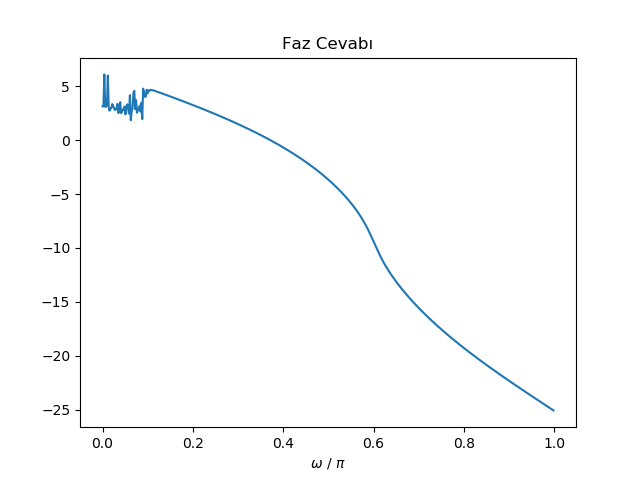

In [145]:
## IIR Yüksek Geçiren Filtre

 
filter_data = loadmat('highpass.mat') 

Coeffs = filter_data['ba'].astype(np.float) 

b = Coeffs[:,0] 
a = Coeffs[:,1] 

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))


plt.figure()
plt.title("Genlik Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_mag)

plt.figure()
plt.title("Faz Cevabı")
plt.xlabel("$\omega$ / $\pi$")
plt.plot(w/np.pi,Hw_phs)


511


<IPython.core.display.Javascript object>


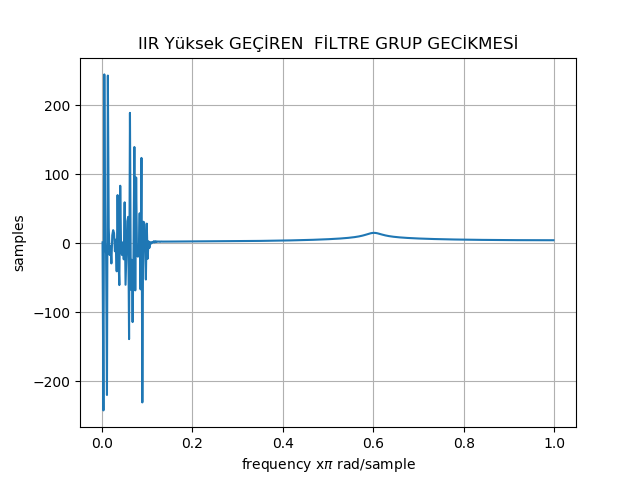

In [146]:
## Grup Gecikmesi 
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

print(len(tau_w))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.title("IIR Yüksek GEÇİREN  FİLTRE GRUP GECİKMESİ")
plt.grid()

## Elde edilen yüksek geçiren filtre alçak frekanslı işaretleri geçirmeyecek şekilde tasarlanmıştır.

## Grup gecikmesi de faz cevabının lineer olduğu yerlerde beklenildiği gibi sabit gelmiştir.

# Soru-4

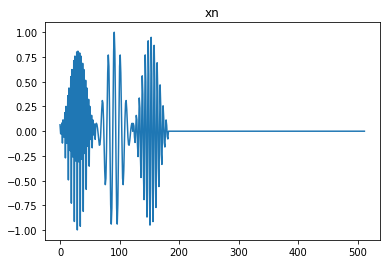

In [3]:
# xn ile ilgili işlemler:

# Generate the individual components and the input signal
N = 512 
M = 60 

n = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5) # component with w1 = 0.8*pi frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)


plt.figure()
plt.title("xn")
plt.plot(xn)

In [8]:
# Calculate the Fourier transform of xn

w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

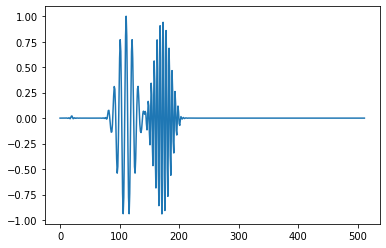

In [6]:
# 2. Soruda Alçak geçiren filtre ile 
## 1. AGF (FIR)
filter_data = loadmat('alcakgeciren.mat') # load the filter obtained from␣

Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣

b = Coeffs[:,0] # first column is b



w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

#### Filtrenin uygulanması 

yn = sgnl.lfilter(b,1, xn) # using the coefficients, we applied the␣

plt.figure()
plt.plot(yn)


In [10]:
## Yukarıda Birinci grafik xn ikinci grafik ise yn dir.

## Alçak Geçiren filtre olduğu için sinyalin sadece geçirme bandında kalan kısmının geçmesi beklenmekte idi fakat öyle olmadı.Sadece xn içerisinde bulunan ilk sinyalde bir değişiklik meydana geldi.

## Aynı zamanda İşaretin genliği azaldı.

## Beklenen: Alçak frekans da kalan işaretin geçmesi geri kalan iki işaretin geçmemesi idi , fakat bu gerçekleşmedi.

<IPython.core.display.Javascript object>


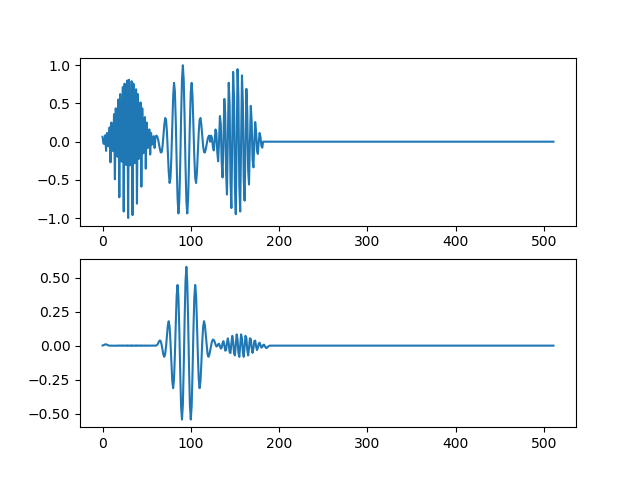

In [144]:
# 2. Soruda Bant Geçiren geçiren filtre ile 

## FIR BandPass
 
filter_data = loadmat('bandpass_fır.mat') # load the filter obtained from␣

Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣

b = Coeffs[:,0] # first column is b


w, Hw = sgnl.freqz(b)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))


## Filtrenin uygulanması 


Yw_shifted = Hw * Xw_shifted

Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣


fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)

ax2.plot(yn)


In [ ]:
## Yukarıda Birinci grafik xn ikinci grafik ise yn dir.

## Filtre tipi bant geçiren olduğu için belirli bir frekansın üstündeki işaretleri geçirmesi beklenmekte idi.Ki öylede olmuştur. Filtrenin belirli bir frekansdan sonra geçirme frekansı bittiği için(Durdurma bandı başladığı için) geçireceği sinyal düzgün gözükmemektedir.Düzgün gözükmeyen işaretler gürültü olarak da algılanabilir.

## Filtreden geçen işaretin normal işarete göre genliği azalmıştır.




## Filtre beklenildiği gibi çalışmıştır.

In [ ]:
## Soru-3 de elde edilen filtrelerin kullanılması:

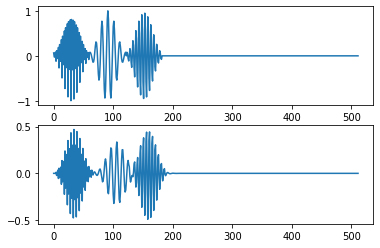

In [117]:
### Yüksek Geçiren filtrenin Uygulanması  (IIR)


filter_data = loadmat('highpass.mat') 

Coeffs = filter_data['ba'].astype(np.float) 

b = Coeffs[:,0] 
a = Coeffs[:,1] 

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

#### Filtrenin uygulanması 

Yw_shifted = Hw * Xw_shifted 

Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)




In [ ]:
## Yukarıda Birinci grafik xn ikinci grafik ise yn dir.

## Yüksek geçiren filtre uygulandığında,beklenildiği gibi yüksek frekanslarda giriş işareti doğru bir şekilde geçirilmiştir.Fakat alçak frekanslarda işaret doğal olarak doğru bir şekilde gözükmemektedir. 

## Yüksek geçiren bir filtreden normalde beklenen alçak frekanslarda ki işaretleri geçirmeyip yüksek frekanslardaki işaretlerin geçmesi idi.Fakat elde edilen sonuçlar değerlendirilirse beklenen gerçekleşmemiştir.

## Filtreden geçen işaretin genliğinde azalma olmuştur.

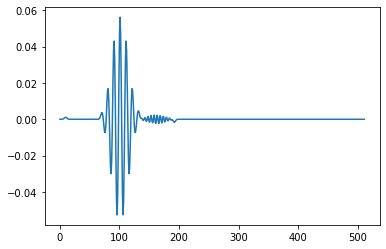

In [7]:
# IIR ALÇAK GEÇİREN FİLTRE 

# IIR Alçak Geçiren Filtre

filter_data = loadmat('lowpass_ıır.mat') 

Coeffs = filter_data['ba'].astype(np.float) 

b = Coeffs[:,0] # first column is b
a = Coeffs[:,1] # second column is a (only if the filter is IIR)



w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))



### filtrenin uygulanması :

Yw_shifted = Hw * Xw_shifted 

Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)


In [ ]:
## Yukarıda Birinci grafik xn ikinci grafik ise yn dir.

## IIR filtre beklenildiği gibi çalışmıştır.Düşük frekanslarda sinyal geçirilirken yüksek frekanslarda geçirilmemiştir.Fakat yüksek frekanslarda da gürültüler gözükmektedir.

## 